In [16]:
from stdp_assemblies import *
import pars


In [ ]:

params = pars.pars_input_strength

N_target = params["N_target"]
Wsums = []
tend = 100_000/params["mu"]
maxsum = (N_target*N_target-N_target)*params["w_max"]
wins = np.linspace(0.05,0.15,21)
Ws = []

for win in wins:
    print("Simulating with w_in = {:.3f}".format(win))
    params["w_in"] = win
    W = np.zeros((params["N"],params["N"]))
    W[:N_target,-1] = params["w_in"]
    network = hawkes_network(**params)
    network.W = np.copy(W)
    network.f0[-1] = params["r_in"] 
    network.set_f0()
    network.simulate(10000,warmup=True,external=1)
    network.simulate(tend,external=1)
    Wsums.append(np.sum(network.W[:N_target,:N_target])/maxsum)
    Ws.append(np.copy(network.W))

In [8]:
prediction = 0.109104 

[]

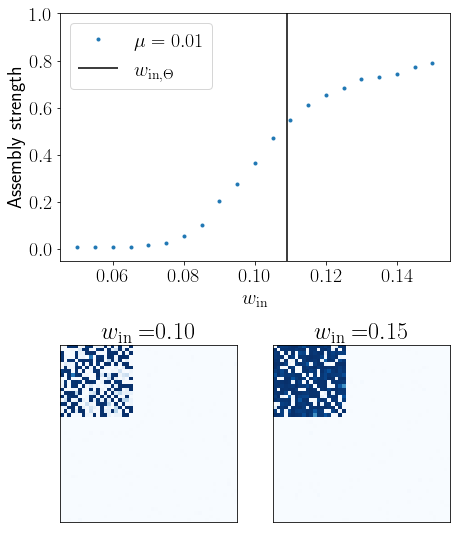

In [35]:
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams["text.usetex"] = True
mpl.rcParams.update({"font.size": 20})


fig = plt.figure(figsize= (7,10))
axs = [plt.subplot(2,1,1), plt.subplot(2,2,3),plt.subplot(2,2,4)]
axs[0].plot(wins,Wsums,".",label="$\mu={}$".format(params["mu"]))
axs[0].vlines(prediction, -1, 10,colors="black", label='$w_{\mathrm{in}, \Theta }$')
axs[0].set_ylim([-0.05,1.0])
axs[0].legend()
axs[0].set_xlabel("$w_{\mathrm{in}}$")
axs[0].set_ylabel("Assembly strength")
plotmat(axs[1],Ws[11][:-1,:-1])
axs[1].set_title("$w_{\mathrm{in}} =$"+"${:.2f}$".format(wins[11]))
axs[1].set_yticks([])
axs[1].set_xticks([])
plotmat(axs[2],Ws[-1][:-1,:-1])
axs[2].set_title("$w_{\mathrm{in}} =$"+"${:.2f}$".format(wins[-1]))
axs[2].set_yticks([])
axs[2].set_xticks([])